<font color = red> <font size = 6> Importing Libraries

In [ ]:
# Sequential API to create Models
from keras.models import Sequential

# Components to create a Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

# Stochastic Gradient Descent Algorithm
from keras.optimizers import SGD

# Keras already hosted MNIST dataset for us
from keras.datasets import mnist

# A Keras utility to binarize integers
from keras.utils import to_categorical

# A Keras utility to visualize Model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of it's utilities
from skimage.io import imshow # To display images

# Another Python library for plotting things
import matplotlib.pyplot as plt

# Another Python library to manipulate vectors, metrices, arrays etc.
import numpy as np

<font size = 6><font color = cyan> Hyper-<font color = yellow>Parameters

In [ ]:
# Hyperparameters are those parameters which we can choose or select by our choice!

# whole dataset splits into batches
batch_size = 128 # Each batch will have 128 samples each!

# Number of labels of our dataset
num_classes = 10 # MNIST dataset has values between 0 to 9. So, 10 classes or labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Number of times we want to train the Model
nb_epoch = 10 # epoch ---> how many times we want to Train our Model before Testing!

<font size = 6><font color = lime> Load Data

In [ ]:
# Load MNIST dataset
# Data split into two sub-set: Traing and Test
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Input or Feature is X_train and it's associated label is y_train. Same also for test dataset.
# We didn't define any value for splitting. It is done by default.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<font size = 6><font color = cyan> Data Statistics

In [ ]:
print("Number of Training Samples : ", len(X_train))
print("Number of Associated Labels : ", len(y_train))

Number of Training Samples :  60000
Number of Associated Labels :  60000


In [ ]:
print("Shape of Training Data : ", X_train.shape) # These image data are stored as numpy array. We can consider it as a matrix.
                                                  # (60000, 28, 28) means 60000 samples of data with 28 * 28 dimension or 28 height and 28 width.

Shape of Training Data :  (60000, 28, 28)


In [ ]:
print("Data type of Training samples : ", X_train.dtype) # uint8 ---> unsigned integer. Means values are intergers and range is between 0 to 255.

Data type of Training samples :  uint8


In [ ]:
print("Number of Test Samples : ", len(X_test))
print("Number of Associated Labels : ", len(y_test))

Number of Test Samples :  10000
Number of Associated Labels :  10000


In [ ]:
print("Shape of Training Labels : ", y_train.shape) # (60000,) ---> because our label is a single integer! That's why only 1 value. [0 or 2 or 9 etc. etc.]

Shape of Training Labels :  (60000,)


In [ ]:
print("Shape of Test Data : ", X_test.shape) # Same like shape of train data.

Shape of Test Data :  (10000, 28, 28)


In [ ]:
print("Data type of Test samples : ", X_test.dtype) # unsigned integer is represented by "uint8"

Data type of Test samples :  uint8


In [ ]:
print("Shape of Test Labels : ", y_test.shape) # Same as shape of training labels. Can be imagined as a 1D vector.

Shape of Test Labels :  (10000,)


<font size = 6><font color = red> Visualize Data

In [ ]:
# A single sample among 60,000 samples
X_train[0].shape

(28, 28)

In [ ]:
a_random_sample = X_train[0]

# Pixel values of the sample
a_random_sample              # We can see our random_sample is an array. And the values shown in the array are the pixel values. All these pixel values are integers. And range between 0 to 255.
                             # Note : At present in the updated colab, image is directly shown. To see the pixel values, click on the "show data" button on output.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

/tmp/ipython-input-4084086330.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(random_image)


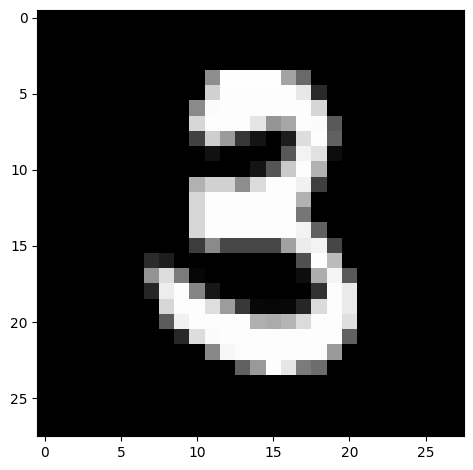

In [ ]:
# Get a random sample
random_image = X_train[56321]

# Display it
imshow(random_image)

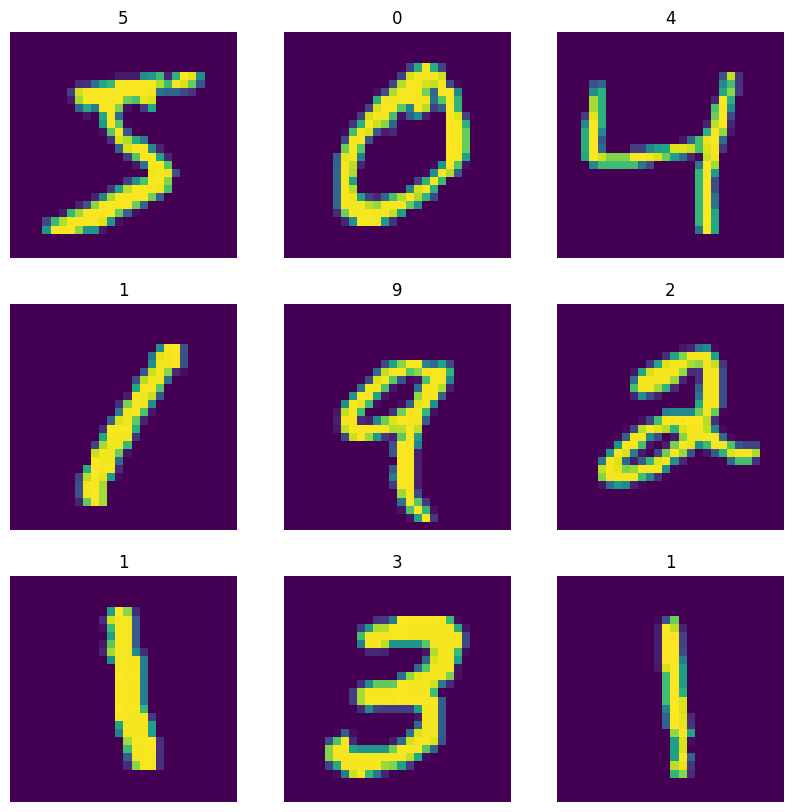

In [ ]:
# To plot multiple images ---

# Define the size of the figure
plt.figure(figsize=(10,10))

for i in range(9):
  ax = plt.subplot(3, 3, i+1)

  # Get a sample at index i
  an_image = X_train[i]

  # Display the sample
  plt.imshow(an_image)

  # Display the label of the sample as title
  plt.title(int(y_train[i]))

  plt.axis("off")

<font size = 5><font color = lime> Since we are implementing CNN, we don't need to do Flatten Data (into 1D) and some related things here.

<font size = 6><font color = red> Change dataType of Train and Test data

In [ ]:
print("Previous Data type of Training samples : ", X_train.dtype)
print("Previous Data type of Testing samples : ", X_test.dtype)

# Change data type of train and test data          # In FNN, we didn't have any mechanism to pass an image directly as input in the network. So, we have to Flatten it to 1D before passing it in the Neural Network.
X_train = X_train.astype('float32')                # We can give/pass a whole image as an input in CNN. So, we don't need to do Flatten operation on data(image).
X_test = X_test.astype('float32')                  # This is needed for scaling of data in the future!

print("New Data type of Training samples : ", X_train.dtype)
print("New Data type of Testing samples : ", X_test.dtype)

Previous Data type of Training samples :  uint8
Previous Data type of Testing samples :  uint8
New Data type of Training samples :  float32
New Data type of Testing samples :  float32


<font size = 6><font color = cyan> Rescaling Data

In [ ]:
# Get a random sample
a_sample = X_train[0]  # Check the minimum and maximum values of a sample to know the minimum and maximum values of the whole dataset.

print("Min value of sample before Rescaling : ", a_sample.min()) # we used min() and max() functions of numpy.
print("Max value of sample before Rescaling : ", a_sample.max())

Min value of sample before Rescaling :  0.0
Max value of sample before Rescaling :  255.0


In [ ]:
# Divide each value in Train and Test data by 255
X_train /= 255 # before doing this operation, we must convert the data type to float. Else it will show error.
X_test /= 255  # Doing the Rescaling operation by dividing every value by 255. This will automatically convert every value between range 0 to 1.

In [ ]:
# Now let's see the new Rescale value's min and max values!
a_sample = X_train[0]

print("Min value of sample after Rescaling : ", a_sample.min()) # we used min() and max() functions of numpy.
print("Max value of sample after Rescaling : ", a_sample.max())

Min value of sample after Rescaling :  0.0
Max value of sample after Rescaling :  1.0


<font size = 6><font color = red> Reshape Train and Test data to 4D

<font size = 5><font color = cyan> In FNN, we had to reduce the shape of input data (from 3D to 1D) because FNN can not take 3D input. But in CNN, we have to expend the data from 3D to 4D! <br/> Why? Because the library we imported from Keras(Conv2D) for CNN implementation can not take 3D inputs. It can only receive inputs of 4 dimensions (4D).

In [ ]:
# Make sure images have shape (28, 28, 1). First 28 is height, second 28 is width and 1 is the Channel. But why the channel value is 1? Because our images are Grey-scale images.
                                           # We already learnt that grey-scale images have channel value = 1 and RGB images have channel value = 3.

                                           # In our MNIST dataset from Keras, the channel dimension is missing! Only height and width, these 2 information are there. So, we have to expend it. This doesn't make any changes to the values.
                                           # X_train's dimension was (60000, 28, 28). We want to add a dimension to the end of it.
                                           # In Python language, if we calculate index from begining it will be like (0, 1, 2,......) and if we calculate indexes from end then it is lke (-1, -2, -3,.....)
# We want to expend a dim at the end
X_train = np.expand_dims(X_train, -1)      # "-1" indicates the last index. At which array we want to expend? In the "X_train" array.

# We want to expend a dim at the end
X_test = np.expand_dims(X_test, -1)        # If we Train the model with 4D data then we also have to Test the model with 4D data.
                                           # If we had a RGB image dataset then it'll be automatically in 4D. Because it will have channel value = 3 and Dataset like (60000, 28, 28, 3). In that case, it is already in 4D shape. We don't need to convert it to 4D!

# Get new shape of Train and Test
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)

X_train shape :  (60000, 28, 28, 1)
X_test shape :  (10000, 28, 28, 1)


<font size = 6><font color = red> Binarize Labels

In [ ]:
# Display the training labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Shape of training labels
y_train.shape

(60000,)

In [ ]:
# A random array
input_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(input_array)
print("Input array shape : ", input_array.shape)
                                                          # A Demo to understand Binarize!
# Apply "to_categorical" to the random array
output = to_categorical(input_array, num_classes=10)

print(output)
print("Output array shape : ", output.shape)

[0 1 2 3 4 5 6 7 8 9]
Input array shape :  (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Output array shape :  (10, 10)


In [ ]:
# Apply "to_categorical" to train labels
Y_train = to_categorical(y_train, num_classes)
                                               # Apply Binarize to our Original MNIST dataset!
# Apply "to_categorical" to test labels
Y_test = to_categorical(y_test, num_classes)

<font color = red><font size = 6> Define Model

In [ ]:
# Define an input shape for our CNN
input_shape = (28, 28, 1)           # (28, 28, 1) is a Tuple.

In [ ]:
# Keras provides Sequential API to create models
model = Sequential()                            # Sequential helps us stack the layers one by one and build the model.

# Define the input layer
model.add(Input(shape=input_shape))

# 1st Convolution layer
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))  # Why Conv2D? Because our input is 2 dimensional. 28*28 image. What does 32 indicates here? It indicates number of Features.
                                                             # Number of Features(32) we want to extract from our input image. For example the input (28, 28, 1) this 1 slice will be converted into 32 slices (28 , 28, 32)
                                                             # Many features will be highlighted in those 32 slices!  Kernel size is the Filter size. We learn those values. 3*3 is the standard value of a kernel.
# 1st Pooling layer                                          # Every Filter will have an activation function. Here we will use the activation function 'relu'. # 'relu' is rectified linear unit.
model.add(MaxPooling2D(pool_size=(2,2)))                     # relu works in receptive fiels. Receptive fields mean if the input is strong then activate the neuron. Else deactivate the neuron.

# 2nd Convolution layer                                      # Input of 1st Convolution is (28, 28, 1) and output will be (26, 26, 32). We know this from theory lectures!
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))  # Just like 1st Convolution, in 2nd Convolution it will generate 64 Feature-map.
                                                             # Max Pooling reduces the size of [1st Convolution] (26, 26, 32) to half for 2*2 values and it converts to (13, 13, 32).

# 2nd Pooling layer                                          # In the 2nd Convolution we make the slice to 64. Means we are generating 64 Feature-map here. (13, 13, 32) is input shape for 2nd Conv and output shape is (10, 10, 64).
model.add(MaxPooling2D(pool_size=(2,2)))                     # pool_size means Filter size for max_pooling layer. Max_pooling will take the maximum value and down-sample the input feature-map.
                                                             # After 2nd max pooling or down-sampling the size will be from (10, 10, 64) to (5, 5, 64). These values are for Explaination only. Actually it can be a bit more or less.
# Flatten our 4D Tensor to 1D  # 4D Tensor like (128, 5, 5, 64). Here 128 is Batch size.
model.add(Flatten())           # Here we are Flattening inside the model. But why? Because we have a Dense layer ahead! Dense layer is our neurons. Here we have num_classes number of neurons. 10 Neurons to classifiy 10 types of numbers!
                               # Model Training and Deep Learning related works are done with Tensor.
# Last Dense layer to make Classfication # Also called Classifier layer.
model.add(Dense(num_classes, activation='softmax')) # "softmax" is used as Activation Function in the Multi-class classification.

# We take input from input layer. We Extract our features from Convolution layers and down-sample the features with Max Pooling layer. Flatten the sample with Flatten layer and generate output from Dense layer!

<font color = red><font size = 6> Compile Model

In [ ]:
# Choose learning rate
learning_rate = 0.001 # Normally this is the standard value of learning rate.

# Select Optimizer
optimizer = SGD(learning_rate=learning_rate)

# Select Loss function
loss = 'categorical_crossentropy'  # loss function or cost function. It is the Norm or Standard practice to take 'categorical_crossentropy' as loss function for multi-class classification. It's works good for this type of problem.

# Select Evaluation matrics
metrics = ['accuracy']      # we can see a value of the metric after every iteration. We can see how our model is performing in every epoch or iteration.

# Model Compilation
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

<font color = red><font size = 6> Visualize Model

In [ ]:
# A Summary of Inputs, Outputs in each layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

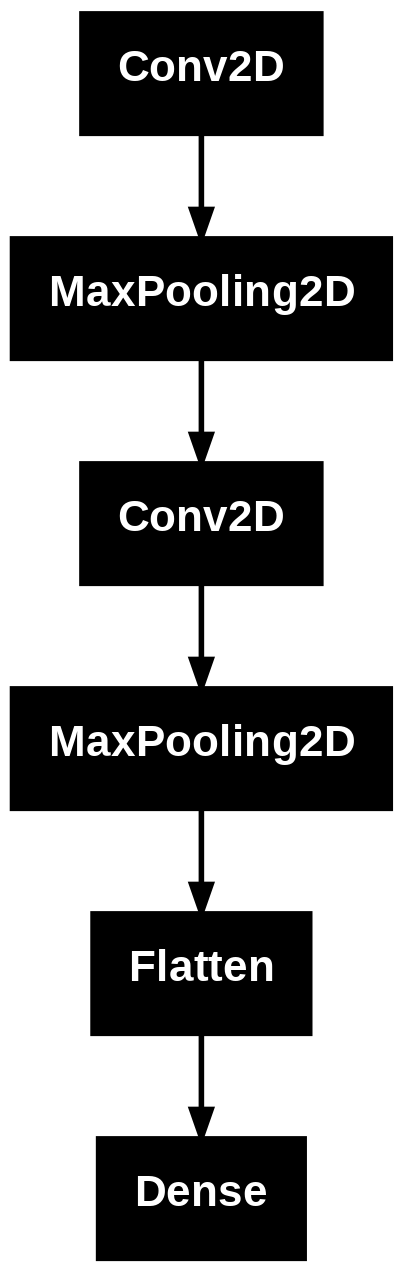

In [ ]:
plot_model(model)

<font color = lime><font size = 6> Model Training

In [ ]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size) # X_train is our data. # Y_train is our data's associated labels. # nb_epoch and batch_size is defined at the very begining! Now you can experiment by changing nb_epoch and batch_size values.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.1086 - loss: 2.2897
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.3716 - loss: 2.2211
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 101ms/step - accuracy: 0.5279 - loss: 2.1076
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.6539 - loss: 1.8536
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.7342 - loss: 1.3676
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.7924 - loss: 0.9114
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.8308 - loss: 0.6722
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.8573 - loss: 0.5476
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.8724 - loss: 0.4753
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.8839 - loss: 0.4266


<font color = Lime><font size = 6> Inference on Test Data

In [ ]:
# Evaluate on Test Data # Test Accuracy
evaluation = model.evaluate(X_test, Y_test)  # evaluation is basically a list

# Display Test statistics
print("Summary : Loss over the Test Dataset : %.2f, Accuracy : %.2f" % (evaluation[0]*100, evaluation[1]*100)) # Training accuracy came 88.39% on 10th epoch. Test accuracy came 89.10%.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8704 - loss: 0.4426
Summary : Loss over the Test Dataset : 39.19, Accuracy : 89.10


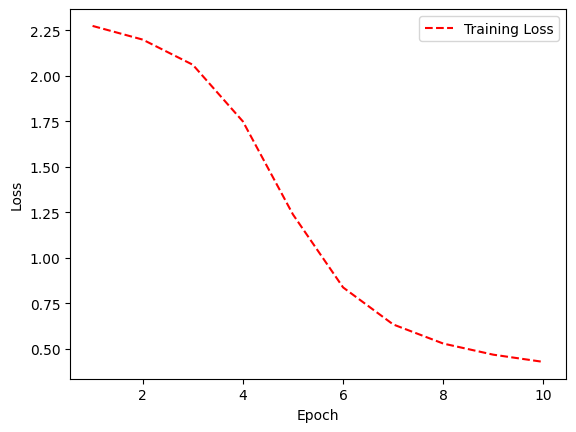

In [ ]:
# Get Training Loss histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize Loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

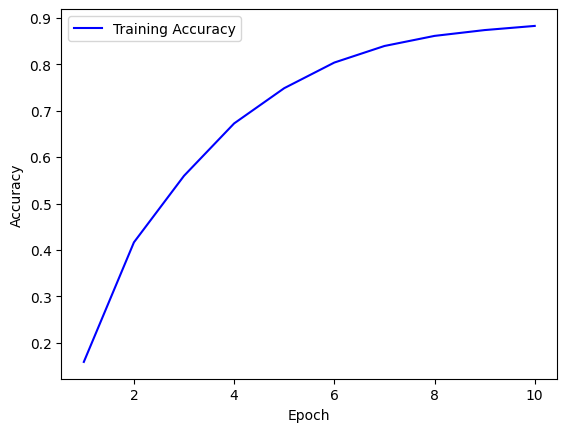

In [ ]:
# Get Training Accuracy histories
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize Accuracy history
plt.plot(epoch_count, training_accuracy, 'b-')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# We can do further Hyperparameters Tuning to get the best Accuracy.